In [261]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")  #adding style to our plots

In [262]:
df=pd.read_csv('Titanic_dataset.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S


In [263]:
new_cols=['pclass','name','ticket','sex','age','sibsp','parch','fare','cabin','embarked','survived']
df=df.reindex(columns=new_cols)

In [264]:
df.shape

(1309, 11)

In [265]:
df.dtypes

pclass        int64
name         object
ticket       object
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
cabin        object
embarked     object
survived      int64
dtype: object

In [266]:
df.describe()

,pclass,age,sibsp,parch,fare,survived
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,0.381971
std,0.837836,14.413500,1.041658,0.865560,51.758668,0.486055
min,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [267]:
df.name.nunique()

1307

In [268]:
df.ticket.nunique()

929

In [269]:
df.cabin.nunique()

186

In [270]:
df.embarked.unique()

array(['S', 'C', nan, 'Q'], dtype=object)

In [271]:
df.nunique()

pclass         3
name        1307
ticket       929
sex            2
age           98
sibsp          7
parch          8
fare         281
cabin        186
embarked       3
survived       2
dtype: int64

<AxesSubplot:>

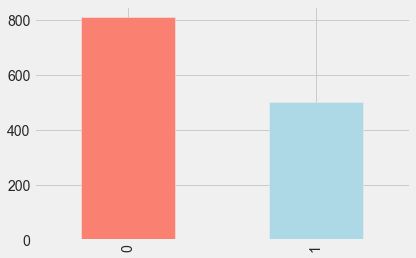

In [272]:
df.survived.value_counts().plot(kind="bar", color=["salmon", "lightblue","yellow"])

<AxesSubplot:xlabel='count', ylabel='sex'>

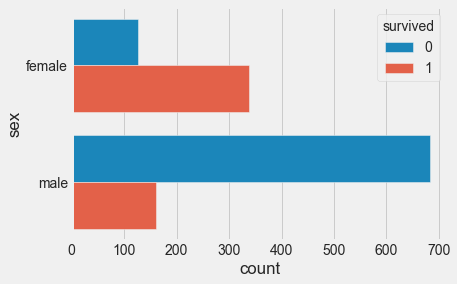

In [273]:
sns.countplot(y='sex',data=df, hue='survived')

In [274]:
#plt.pie(df.embarked,df.survived)

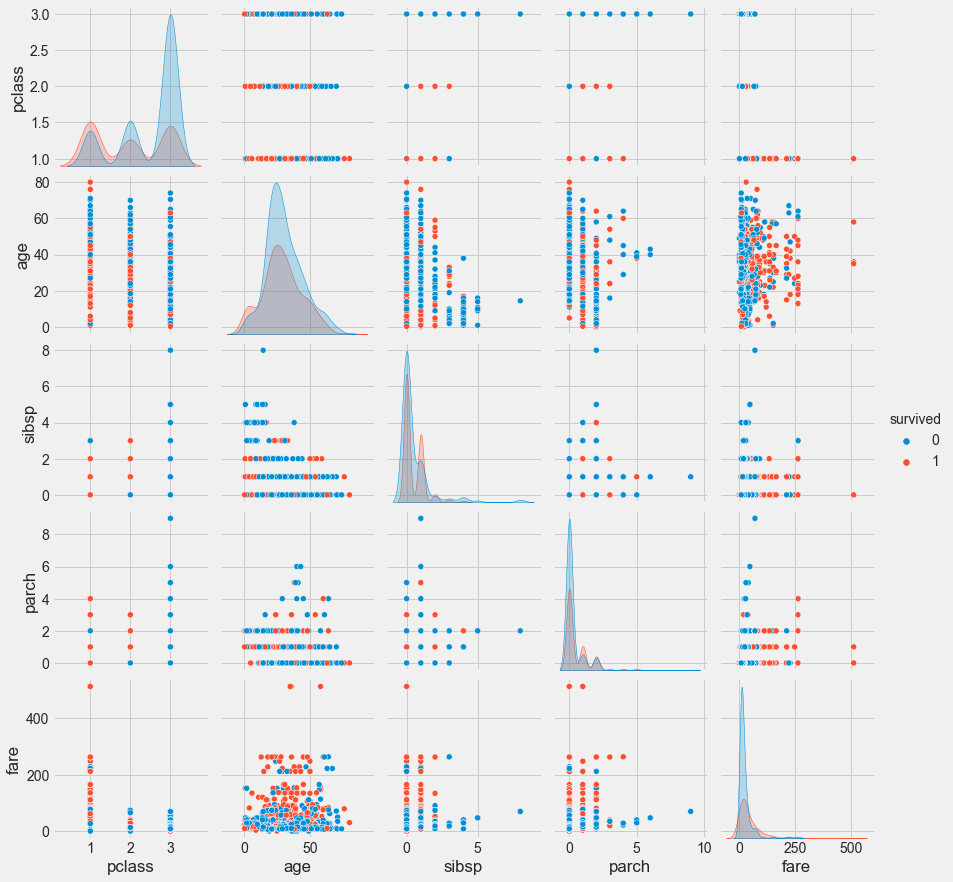

In [275]:
sns.pairplot(df,hue='survived')

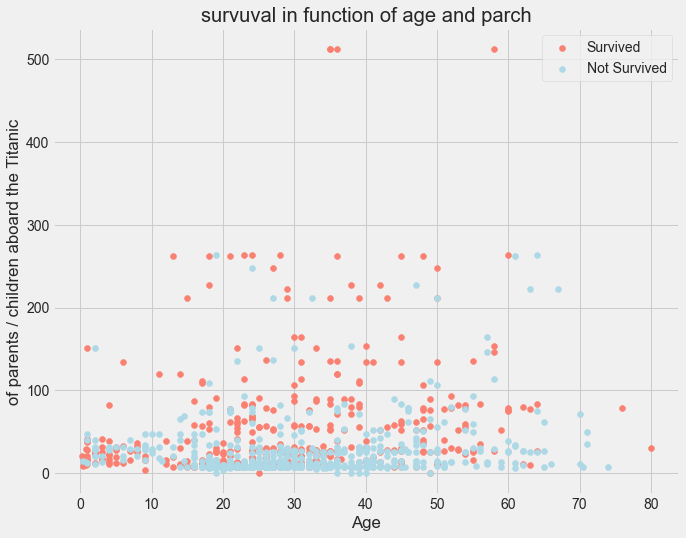

In [276]:
plt.figure(figsize=(10, 8))

plt.scatter(df.age[df.survived==1],
            df.fare[df.survived==1],
            c="salmon")

plt.scatter(df.age[df.survived==0],
            df.fare[df.survived==0],
            c="lightblue")

plt.title("survuval in function of age and parch")
plt.xlabel("Age")
plt.ylabel("of parents / children aboard the Titanic")
plt.legend(["Survived", "Not Survived"]);

<AxesSubplot:>

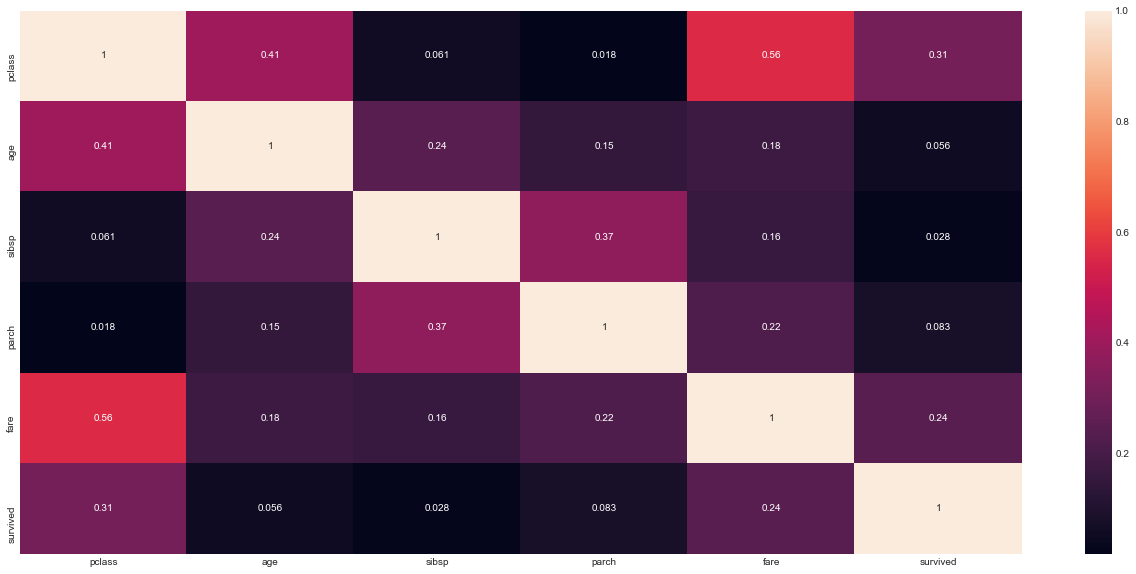

In [277]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)

In [278]:
continous_val=df[['age','parch','sibsp','fare']]
continous_val

,age,parch,sibsp,fare
0,29.0000,0,0,211.3375
1,0.9167,2,1,151.5500
2,2.0000,2,1,151.5500
3,30.0000,2,1,151.5500
4,25.0000,2,1,151.5500
...,...,...,...,...
1304,14.5000,0,1,14.4542
1305,NaN,0,1,14.4542
1306,26.5000,0,0,7.2250
1307,27.0000,0,0,7.2250


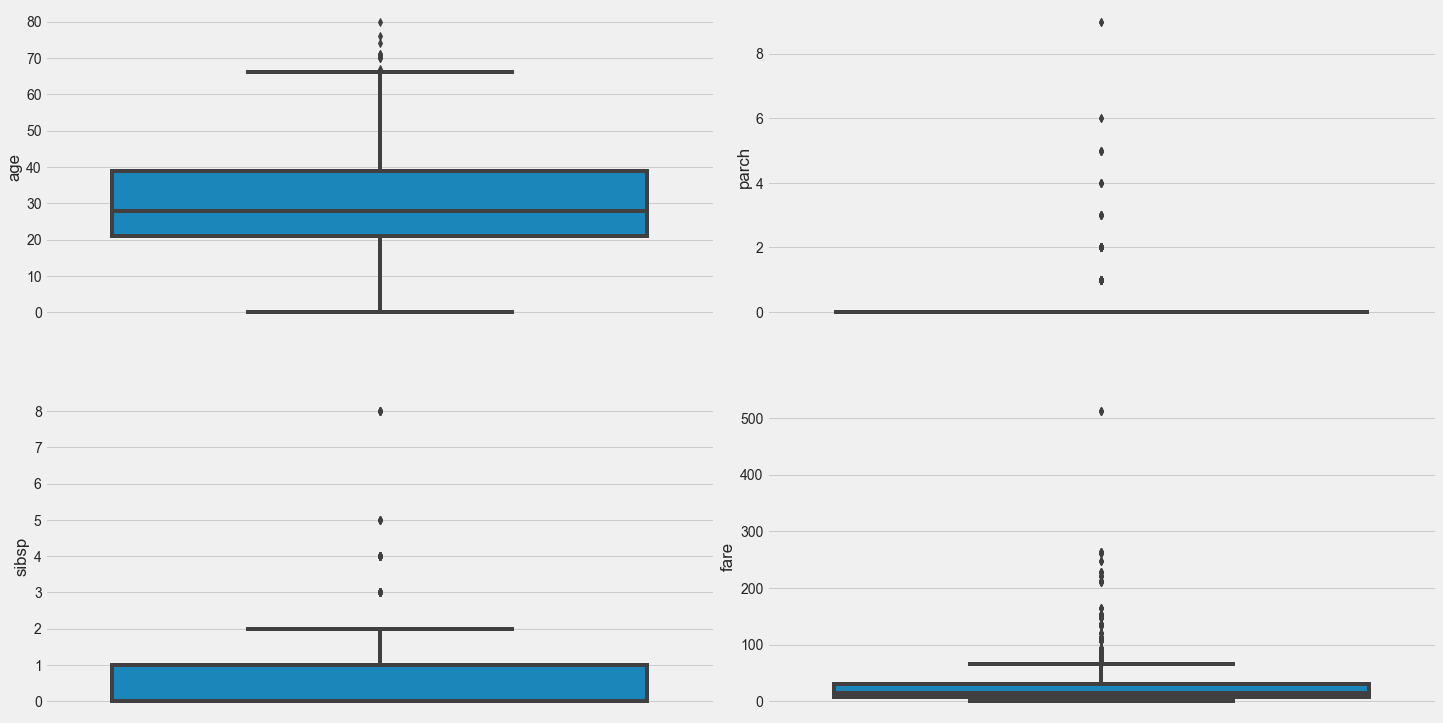

In [101]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 10))
index = 0
new=df[continous_val]
axs = axs.flatten()
for k,v in new.items():
    sns.boxplot(y=k, data=new, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [279]:
for k, v in continous_val.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]

In [280]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [281]:
df[['fare']]=scaler.fit_transform(df[['fare']])
df

,pclass,name,ticket,sex,age,sibsp,parch,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",24160,female,29.0000,0,0,3.441165,B5,S,1
1,1,"Allison, Master. Hudson Trevor",113781,male,0.9167,1,2,2.285603,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",113781,female,2.0000,1,2,2.285603,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",113781,male,30.0000,1,2,2.285603,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",113781,female,25.0000,1,2,2.285603,C22 C26,S,0
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",2665,female,14.5000,1,0,-0.364161,NaN,C,0
1305,3,"Zabour, Miss. Thamine",2665,female,NaN,1,0,-0.364161,NaN,C,0
1306,3,"Zakarian, Mr. Mapriededer",2656,male,26.5000,0,0,-0.503886,NaN,C,0
1307,3,"Zakarian, Mr. Ortin",2670,male,27.0000,0,0,-0.503886,NaN,C,0


In [282]:
df=df.drop(['name','ticket'], axis=1)

In [283]:
df.cabin.isnull().sum()

1014

In [284]:
df=df.drop('cabin', axis=1)

In [285]:
df.head()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,1,female,29.0000,0,0,3.441165,S,1
1,1,male,0.9167,1,2,2.285603,S,1
2,1,female,2.0000,1,2,2.285603,S,0
3,1,male,30.0000,1,2,2.285603,S,0
4,1,female,25.0000,1,2,2.285603,S,0


In [318]:
X=df.drop('survived',axis=1)
y=df[['survived']]
cols=X.columns

In [319]:
X

,pclass,sex,age,sibsp,parch,fare,embarked
0,1,female,29.0000,0,0,3.441165,S
1,1,male,0.9167,1,2,2.285603,S
2,1,female,2.0000,1,2,2.285603,S
3,1,male,30.0000,1,2,2.285603,S
4,1,female,25.0000,1,2,2.285603,S
...,...,...,...,...,...,...,...
1304,3,female,14.5000,1,0,-0.364161,C
1305,3,female,NaN,1,0,-0.364161,C
1306,3,male,26.5000,0,0,-0.503886,C
1307,3,male,27.0000,0,0,-0.503886,C


In [320]:
X.shape

(1309, 7)

In [321]:
y.shape

(1309, 1)

In [322]:
X.isnull().sum()

pclass        0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

In [323]:
from sklearn.impute import SimpleImputer
mean_imp=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X=mean_imp.fit_transform(X)

In [324]:
X=pd.DataFrame(X, columns=cols)

In [325]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X['sex']=le.fit_transform(X['age'])
X['embarked']=le.fit_transform(X['embarked'].astype(str))

In [326]:
X.isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [327]:
X

,pclass,sex,age,sibsp,parch,fare,embarked
0,1,44,29.0,0,0,3.441165,2
1,1,6,0.9167,1,2,2.285603,2
2,1,8,2.0,1,2,2.285603,2
3,1,45,30.0,1,2,2.285603,2
4,1,38,25.0,1,2,2.285603,2
...,...,...,...,...,...,...,...
1304,3,22,14.5,1,0,-0.364161,0
1305,3,36,24.0,1,0,-0.364161,0
1306,3,40,26.5,0,0,-0.503886,0
1307,3,41,27.0,0,0,-0.503886,0


In [340]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [341]:
X_train.shape

(1047, 7)

In [342]:
y_train.shape

(1047, 1)

In [346]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [347]:
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [348]:
model.score(X_test, y_test)

0.6984732824427481

In [353]:
y_pred=model.predict(X_test)

In [354]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.74      0.81      0.77       167
           1       0.60      0.49      0.54        95

    accuracy                           0.70       262
   macro avg       0.67      0.65      0.66       262
weighted avg       0.69      0.70      0.69       262



In [355]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[136,  31],
       [ 48,  47]], dtype=int64)

In [356]:
from sklearn.metrics import precision_recall_fscore_support
score=precision_recall_fscore_support(y_test,y_pred)
score

(array([0.73913043, 0.6025641 ]),
 array([0.81437126, 0.49473684]),
 array([0.77492877, 0.5433526 ]),
 array([167,  95], dtype=int64))